<a href="https://colab.research.google.com/github/HSJung93/CongressLogROK/blob/master/CongressPreprocessor_0924.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

18대 19대 의회 회의록 전처리 코드

1. Colab과 google drive 연결; 구글 드라이브에서 공유하고 있는 회의록 파일을 Colab에 연동하여 분석하기 위한 사전 작업.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. 각 회의록 파일 불러오기: 공유된 드라이브에서 각 파일을 불러와 Files라는 list에 저장하는 코드

In [2]:
 from os import listdir
 from os.path import isfile, join
 filespath = '/content/drive/My Drive/all'
 files = [f for f in listdir(filespath) if isfile(join(filespath, f))]

 filepath=[]
 for file in files:
     filepath.append(filespath + '/' + file)

 Files = []
 for i in filepath:
     f = open(i, encoding='CP949')
     text = f.read()
     Files.append(text)
     f.close

3. 전처리 코드 함수화: 각 회의록에 대해서 다음과 같은 작업을 수행함
- 발언 기호 ◯를 기준으로 텍스트를 나눔
- 나눈 텍스트에서 발언자와 발언을 분리함
- 띄어쓰기를 기준으로 길이를 잼
- 특정한 단어의 횟수를 기록함(단어를 띄어쓰기 단위로 나누었다는 한계 존재)


In [3]:
len(Files)

3160

In [20]:
def cleaner(text, j):
    import re
    import pandas as pd
    text=str(text)
    text_split=text.split('\n.')

    name = []
    talk = []
    length = []
    
    for i in range(0, len(text_split)):
        name.append(" ".join(text_split[i].split()[:2]))
        talk.append(" ".join(text_split[i].split()[2:]))
        length.append(len(text_split[i].split()[2:]))
    
    data = {
        'NAME': name,
        'TALK': talk,
        'LENGTH': length,
        'FILENAME' : filepath[j],
        'INDEX_IN_MEETING' : list(range(0, len(text_split)))
        }
    d=pd.DataFrame(data)
    return d

4. 한 회의록 파일 확인, 함수에 필요한 키워드 변수 할당


In [21]:
start = cleaner(Files[0], 0)
start

,NAME,TALK,LENGTH,FILENAME,INDEX_IN_MEETING
0,311 지식경제위원회회의록,11 2012년10월30일(화) 지식경제위원회회의실 (14시08분 개의),5,/content/drive/My Drive/all/국회회의록_19대_...,0
1,위원장 강창일,좌석을 정돈해 주시기 바랍니다. 성원이 되었으므로 제311회 국회(정기회) 제11차...,15,/content/drive/My Drive/all/국회회의록_19대_...,1
2,위원장 강창일,의사일정 제1항 2012년도 전력산업기반기금운용계획 변경안을 상정합니다. 전력산업기...,72,/content/drive/My Drive/all/국회회의록_19대_...,2
3,김동철 위원,그 전에 의사진행발언 있습니다.,4,/content/drive/My Drive/all/국회회의록_19대_...,3
4,위원장 강창일,"예, 김동철 위원님.",3,/content/drive/My Drive/all/국회회의록_19대_...,4
...,...,...,...,...,...
196,위원장 강창일,"그러면 그 답변은, 하나도 보전 안 해 주는 건 잘못된 것이고요.",11,/content/drive/My Drive/all/국회회의록_19대_...,196
197,지식경제부장관 홍석우,"예, 뭐 한 푼도 없다는 건 잘못됐습니다. 맥시멈 3000만 원이 되겠습니다.",11,/content/drive/My Drive/all/국회회의록_19대_...,197
198,위원장 강창일,뭐 사과까지는 할 필요 없고 그렇게 해명하면 됐습니다.,8,/content/drive/My Drive/all/국회회의록_19대_...,198
199,지식경제부장관 홍석우,예.,1,/content/drive/My Drive/all/국회회의록_19대_...,199


5. 회의록 파일 병합(회차 별) 후 저장



In [22]:
len(Files)

3160

In [23]:
import pandas as pd

for j in range(len(Files)-2):   
    start = pd.concat([start, cleaner(Files[j+1], j+1)])

In [24]:
start.shape

(1477086, 5)

In [25]:
all = start

In [26]:
all.shape

(1477086, 5)

In [27]:
all.to_csv("18-19congress_cleaned_0924.csv")

In [28]:
all.to_csv("18-19congress_cleaned_0924_utf8.csv", encoding="utf-8")

In [29]:
all['INDEX'] = list(range(len(all)))

Whole indexing

In [30]:
all['filepath_resi_front'] = start.FILENAME.str.split('_').str[0]

In [31]:
all['ROUND1'] = start.FILENAME.str.split('_').str[1]

In [32]:
all['ROUND2'] = start.FILENAME.str.split('_').str[2]

In [33]:
all['ROUND3'] = start.FILENAME.str.split('_').str[3]

In [34]:
all['COMMITTEE'] = start.FILENAME.str.split('_').str[4]

In [35]:
all['filepath_resi_back'] = start.FILENAME.str.split('_').str[5]

In [36]:
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1477086 entries, 0 to 635
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   NAME                 1477086 non-null  object 
 1   TALK                 1477086 non-null  object 
 2   LENGTH               1477086 non-null  int64  
 3   FILENAME             1477086 non-null  object 
 4   INDEX_IN_MEETING     1477086 non-null  int64  
 5   INDEX                1477086 non-null  int64  
 6   filepath_resi_front  1477086 non-null  object 
 7   ROUND1               1477086 non-null  object 
 8   ROUND2               1477086 non-null  object 
 9   ROUND3               1477086 non-null  object 
 10  COMMITTEE            1477086 non-null  object 
 11  filepath_resi_back   0 non-null        float64
dtypes: float64(1), int64(3), object(8)
memory usage: 146.5+ MB


In [37]:
all.to_csv("18-19congress_varfromfilepath_0924.csv")
all.to_csv("18-19congress_varfromfilepath_0924_utf8.csv", encoding="utf-8")

In [ ]:
df1.NAME.value_counts().index

Index(['부의장 김동원', '부의장 김약수', '의장 신익희', '부의장 신익희', '의장 이승만', '백관수 의원', '서우석 의원',
       '이진수 의원', '신성균 의원', '서상일 의원',
       ...
       '전원위원장 이청천', '홍길선 의원', '빅헤정 의원', '유홍열 의원', '박준 의원', '의장 심익희', '초운교 의원',
       '의장 이승만원', '징병민 의원', '김상호 의원'],
      dtype='object', length=326)

In [ ]:
name1 = df1.NAME.value_counts()[:10]
name2 = df2.NAME.value_counts()[:10]
name3 = df3.NAME.value_counts()[:10]
name4 = df4.NAME.value_counts()[:10]
name5 = df5.NAME.value_counts()[:10]
name6 = df6.NAME.value_counts()[:10]
name = df.NAME.value_counts()[:20]

In [ ]:
name1

부의장 김동원    1375
부의장 김약수    1081
의장 신익희     1036
부의장 신익희     587
의장 이승만      450
백관수 의원      245
서우석 의원      241
이진수 의원      213
신성균 의원      213
서상일 의원      199
Name: NAME, dtype: int64

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

각 회차 국회에서 많이 발언한 사람들 상위 10명

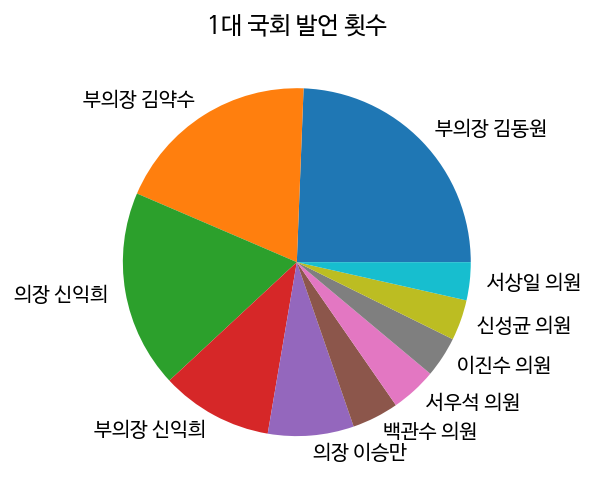

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.pie(name1, labels=name1.index)

plt.title('1대 국회 발언 횟수')
plt.show()

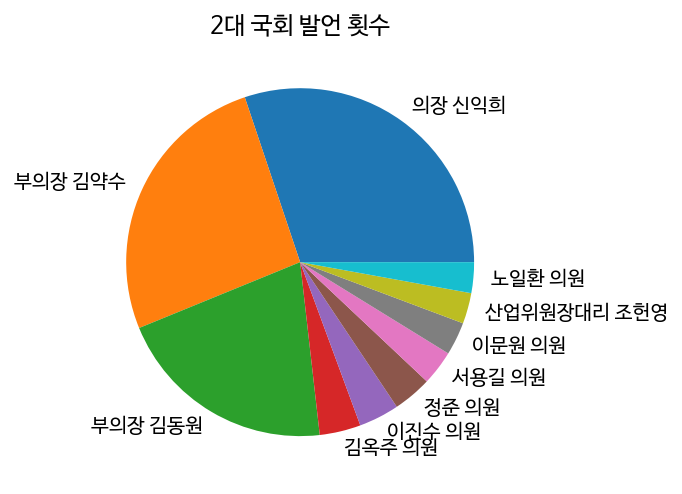

In [ ]:
plt.pie(name2, labels=name2.index)

plt.title('2대 국회 발언 횟수')
plt.show()

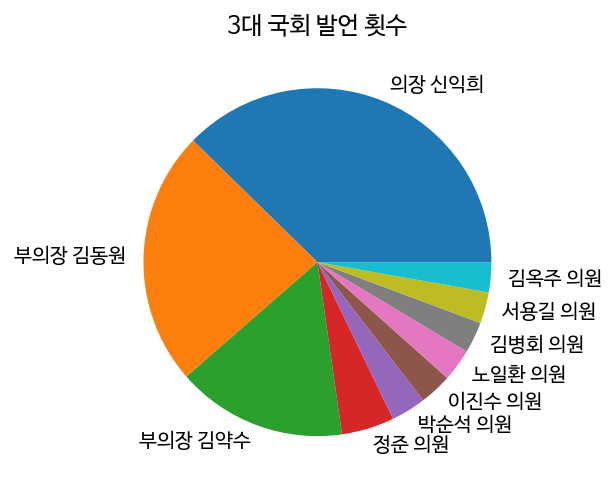

In [ ]:
plt.pie(name3, labels=name3.index)

plt.title('3대 국회 발언 횟수')
plt.show()

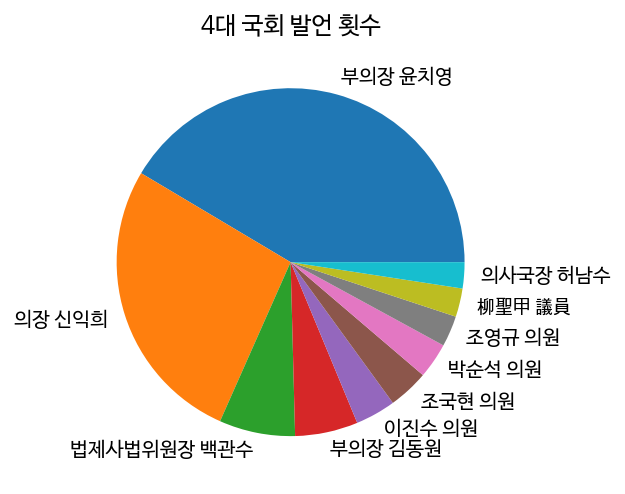

In [ ]:
plt.pie(name4, labels=name4.index)

plt.title('4대 국회 발언 횟수')
plt.show()

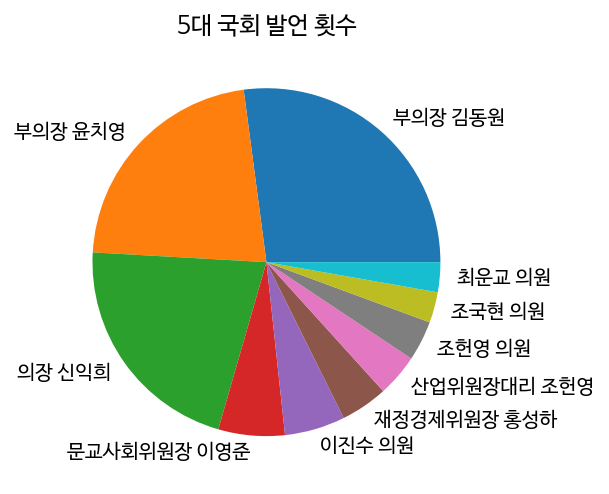

In [ ]:
plt.pie(name5, labels=name5.index)

plt.title('5대 국회 발언 횟수')
plt.show()

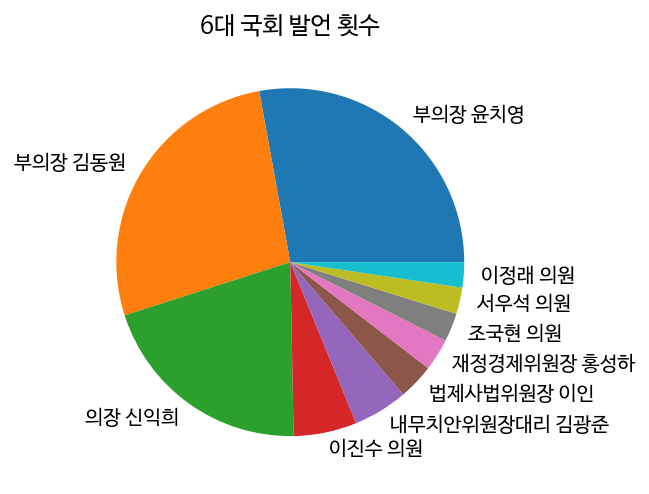

In [ ]:
plt.pie(name6, labels=name6.index)

plt.title('6대 국회 발언 횟수')
plt.show()

발언의 길이 히스토그램

In [ ]:
#!apt-get update -qq
#!apt-get install fonts-nanum* -qq

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48156 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44600 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48156 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50616 missing from current font.
  font.set_te

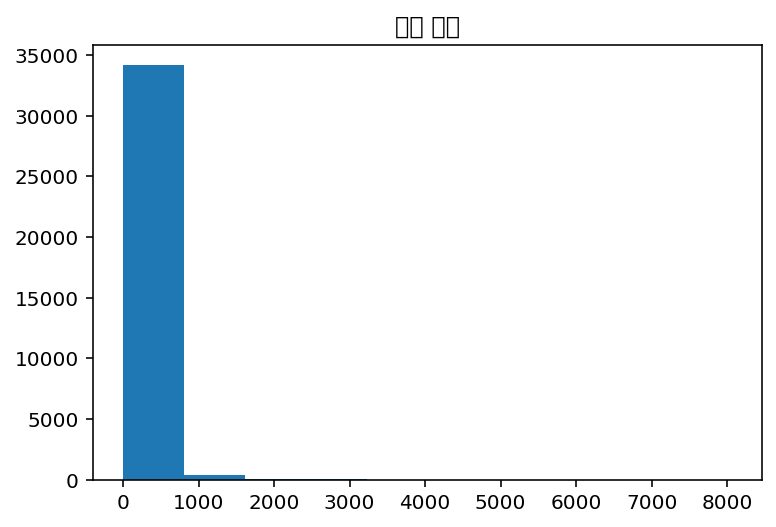

In [ ]:
plt.hist(df.LENGTH)

plt.title('발언 길이')
plt.show()

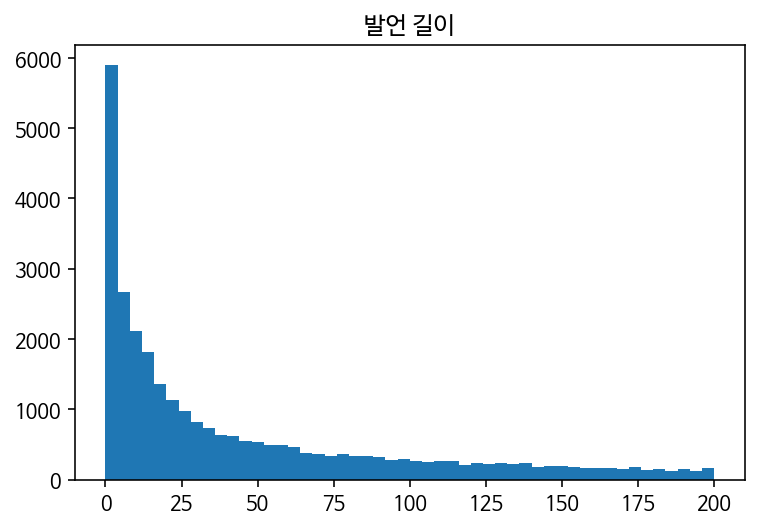

In [ ]:
plt.hist(df.LENGTH, range=(0,200), bins=50)

plt.title('발언 길이')
plt.show()

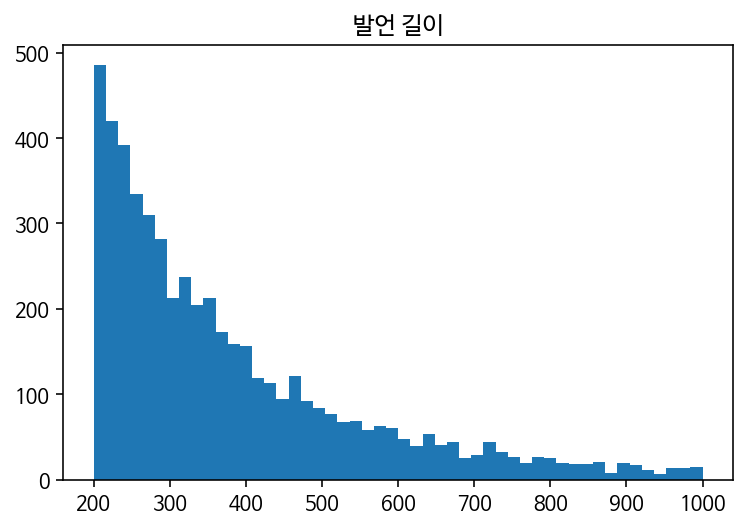

In [ ]:
plt.hist(df.LENGTH, range=(200,1000), bins=50)

plt.title('발언 길이')
plt.show()

의장과 부의장은 제거한 사람들?

In [ ]:
name1_new = df1.NAME.value_counts()[5:15]
name2_new = df2.NAME.value_counts()[3:13]
name3_new = df3.NAME.value_counts()[3:13]
name4_new = df4.NAME.value_counts()[2:12]
name5_new = df5.NAME.value_counts()[3:13]
name6_new = df6.NAME.value_counts()[3:13]

In [ ]:
n1 = pd.DataFrame(name1)
n2 = pd.DataFrame(name2)
n3 = pd.DataFrame(name3)
n4 = pd.DataFrame(name4)
n5 = pd.DataFrame(name5)
n6 = pd.DataFrame(name6)
n = pd.DataFrame(name)

In [ ]:
n1n = pd.DataFrame(name1_new)
n2n = pd.DataFrame(name2_new)
n3n = pd.DataFrame(name3_new)
n4n = pd.DataFrame(name4_new)
n5n = pd.DataFrame(name5_new)
n6n = pd.DataFrame(name6_new)

In [ ]:
n1

,NAME
부의장 김동원,1375
부의장 김약수,1081
의장 신익희,1036
부의장 신익희,587
의장 이승만,450
백관수 의원,245
서우석 의원,241
이진수 의원,213
신성균 의원,213
서상일 의원,199


In [ ]:
n1.index + "/" + n1.NAME.astype(str) 

부의장 김동원    부의장 김동원/1375
부의장 김약수    부의장 김약수/1081
의장 신익희      의장 신익희/1036
부의장 신익희     부의장 신익희/587
의장 이승만       의장 이승만/450
백관수 의원       백관수 의원/245
서우석 의원       서우석 의원/241
이진수 의원       이진수 의원/213
신성균 의원       신성균 의원/213
서상일 의원       서상일 의원/199
dtype: object

In [ ]:
import plotly.express as px
fig = px.pie(n1, values='NAME' , names=(n1.index + "(" + n1.NAME.astype(str) + "회)"  ) , title="1회 국회 발언 횟수 비율")
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [ ]:
import plotly.express as px
fig = px.pie(n1n, values='NAME' , names=n1n.index, title="1회 국회 발언 횟수 비율(의장 제외)")
fig.show()

In [ ]:
import plotly.express as px
fig = px.pie(n2, values='NAME' , names=(n2.index + "(" + n2.NAME.astype(str) + "회)"  ), title="2회 국회 발언 횟수 비율")
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [ ]:
import plotly.express as px
fig = px.pie(n2n, values='NAME' , names=n2n.index, title="2회 국회 발언 횟수 비율(의장 제외)")
fig.show()

In [ ]:
import plotly.express as px
fig = px.pie(n3, values='NAME' , names=(n3.index + "(" + n3.NAME.astype(str) + "회)"  ), title="3회 국회 발언 횟수 비율")
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [ ]:
import plotly.express as px
fig = px.pie(n3n, values='NAME' , names=n3n.index, title="3회 국회 발언 횟수 비율(의장 제외)")
fig.show()

In [ ]:
import plotly.express as px
fig = px.pie(n4, values='NAME' , names=(n4.index + "(" + n4.NAME.astype(str) + "회)" ) , title="4회 국회 발언 횟수 비율")
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [ ]:
import plotly.express as px
fig = px.pie(n4n, values='NAME' , names=n4n.index, title="4회 국회 발언 횟수 비율(의장 제외)")
fig.show()

In [ ]:
import plotly.express as px
fig = px.pie(n5, values='NAME' , names=(n5.index + "(" + n5.NAME.astype(str) + "회)"  ), title="5회 국회 발언 횟수 비율")
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [ ]:
fig = px.pie(n5n, values='NAME' , names=n5n.index, title="5회 국회 발언 횟수 비율(의장 제외)")
fig.show()

In [ ]:
fig = px.pie(n6, values='NAME' , names=(n6.index + "(" + n6.NAME.astype(str) + "회)"  ), title="6회 국회 발언 횟수 비율")
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [ ]:
fig = px.pie(n6n, values='NAME' , names=n6n.index, title="6회 국회 발언 횟수 비율(의장 제외)")
fig.show()

In [ ]:
fig = px.pie(n, values='NAME' , names=(n.index + "(" + n.NAME.astype(str) + "회)"  ), title="제헌 국회 발언 횟수 상위 20명")
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [ ]:
df[df.NAME == "의장 이승만"]

,Unnamed: 0,NAME,TALK,LENGTH,HOWMANY,WHEN,회차
102,103,의장 이승만,지금은 의장 선거가 끝났으니까 다음 절차로 부의장 선거를 한 명식 따로 합니다. 두...,34,자유라는 단어는 0개입니다,/제1회/국회회의록_제헌_1회_1차_국회본회의,1
104,105,의장 이승만,과반수가 되여야 하는데 과반수가 못 되면 어떻게 합니까?,8,자유라는 단어는 0개입니다,/제1회/국회회의록_제헌_1회_1차_국회본회의,1
106,107,의장 이승만,신익희 김동원이 최고점 득점이 분명하니까 두 명 중 하나를 택해서 가결될 것입니다....,30,자유라는 단어는 0개입니다,/제1회/국회회의록_제헌_1회_1차_국회본회의,1
108,109,의장 이승만,이제는 또 부의장 한 명을 투표하기로 되여 있습니다.,8,자유라는 단어는 0개입니다,/제1회/국회회의록_제헌_1회_1차_국회본회의,1
110,111,의장 이승만,또 다른 의논들 나면 시간만 허비하게 되니까…… (투표 시행),9,자유라는 단어는 0개입니다,/제1회/국회회의록_제헌_1회_1차_국회본회의,1
...,...,...,...,...,...,...,...
4003,96,의장 이승만,무슨 좋은 해결책이 있는지…….,4,자유라는 단어는 0개입니다,제1회/국회회의록_제헌_1회_30차_국회본회의,1
4005,98,의장 이승만,대단히 긴급한 말씀입니다. 개의를 먼저 무릅니다. 개의의 주문 다 아시니까 설명 안...,93,자유라는 단어는 0개입니다,제1회/국회회의록_제헌_1회_30차_국회본회의,1
4008,101,의장 이승만,다 자세히 드르세요. 이 수정안은 치안부를 독립시키자는 그것이 수정안입니다. 여기에...,15,자유라는 단어는 0개입니다,제1회/국회회의록_제헌_1회_30차_국회본회의,1
4010,103,의장 이승만,"감시원 세 분이 있어야 하니까 박해정씨, 이범교씨, 정도영씨 나와 주십시요.",10,자유라는 단어는 0개입니다,제1회/국회회의록_제헌_1회_30차_국회본회의,1


In [ ]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 1.4MB/s 
     |████████████████████████████████| 3.8MB 45.4MB/s 
     |████████████████████████████████| 92kB 10.1MB/s 
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
from konlpy.tag import Kkma
from konlpy.utils import pprint
kkma = Kkma()
pprint(kkma.nouns(u'질문이나 건의사항은 깃헙 이슈 트래커에 남겨주세요.'))

['질문', '건의', '건의사항', '사항', '깃헙', '이슈', '트래커']


In [ ]:
이승만 = df[df.NAME == "의장 이승만"]

In [ ]:
이승만

,Unnamed: 0,NAME,TALK,LENGTH,HOWMANY,WHEN,회차
102,103,의장 이승만,지금은 의장 선거가 끝났으니까 다음 절차로 부의장 선거를 한 명식 따로 합니다. 두...,34,자유라는 단어는 0개입니다,/제1회/국회회의록_제헌_1회_1차_국회본회의,1
104,105,의장 이승만,과반수가 되여야 하는데 과반수가 못 되면 어떻게 합니까?,8,자유라는 단어는 0개입니다,/제1회/국회회의록_제헌_1회_1차_국회본회의,1
106,107,의장 이승만,신익희 김동원이 최고점 득점이 분명하니까 두 명 중 하나를 택해서 가결될 것입니다....,30,자유라는 단어는 0개입니다,/제1회/국회회의록_제헌_1회_1차_국회본회의,1
108,109,의장 이승만,이제는 또 부의장 한 명을 투표하기로 되여 있습니다.,8,자유라는 단어는 0개입니다,/제1회/국회회의록_제헌_1회_1차_국회본회의,1
110,111,의장 이승만,또 다른 의논들 나면 시간만 허비하게 되니까…… (투표 시행),9,자유라는 단어는 0개입니다,/제1회/국회회의록_제헌_1회_1차_국회본회의,1
...,...,...,...,...,...,...,...
4003,96,의장 이승만,무슨 좋은 해결책이 있는지…….,4,자유라는 단어는 0개입니다,제1회/국회회의록_제헌_1회_30차_국회본회의,1
4005,98,의장 이승만,대단히 긴급한 말씀입니다. 개의를 먼저 무릅니다. 개의의 주문 다 아시니까 설명 안...,93,자유라는 단어는 0개입니다,제1회/국회회의록_제헌_1회_30차_국회본회의,1
4008,101,의장 이승만,다 자세히 드르세요. 이 수정안은 치안부를 독립시키자는 그것이 수정안입니다. 여기에...,15,자유라는 단어는 0개입니다,제1회/국회회의록_제헌_1회_30차_국회본회의,1
4010,103,의장 이승만,"감시원 세 분이 있어야 하니까 박해정씨, 이범교씨, 정도영씨 나와 주십시요.",10,자유라는 단어는 0개입니다,제1회/국회회의록_제헌_1회_30차_국회본회의,1
